# SVM -  Mushroom Data

In [2]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import precision_recall_fscore_support

import numpy as np
import math
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Reading the data

In [3]:
# Read the csv into dataframe
df_raw = pd.read_csv('mushrooms.csv', engine='python')
df_raw.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Since the data is not numeric, transform the data to numerical values
df = df_raw
for col in df_raw.columns:
    df[col] = LabelEncoder().fit_transform(df_raw[col])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [5]:
print(df.corr())
# We see that veil-type is not related to any other column, so we disregard this feature
df.drop('veil-type', axis=1, inplace=True)

                             class  cap-shape  cap-surface  cap-color  \
class                     1.000000   0.052951     0.178446  -0.031384   
cap-shape                 0.052951   1.000000    -0.050454  -0.048203   
cap-surface               0.178446  -0.050454     1.000000  -0.019402   
cap-color                -0.031384  -0.048203    -0.019402   1.000000   
bruises                  -0.501530  -0.035374     0.070228  -0.000764   
odor                     -0.093552  -0.021935     0.045233  -0.387121   
gill-attachment           0.129200   0.078865    -0.034180   0.041436   
gill-spacing             -0.348387   0.013196    -0.282306   0.144259   
gill-size                 0.540024   0.054050     0.208100  -0.169464   
gill-color               -0.530566  -0.006039    -0.161017   0.084659   
stalk-shape              -0.102019   0.063794    -0.014123  -0.456496   
stalk-root               -0.379361   0.030191    -0.126245   0.321274   
stalk-surface-above-ring -0.334593  -0.030417     0

In [6]:
# Get the feature and output
y = np.array(df.iloc[:,0])
x = df.iloc[:, 1:]

##  Data Pre-Processing
Scale before splitting the data into train and test- scale the data since we will be using gradient ascent

In [7]:
# Split the data into traning and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## SVM using Linear Kernel

In [15]:
from sklearn import svm

def svm_linear(c, x_train, y_train, x_test, y_test, acc_train, acc_test, w):
    # Fit the classifier on the training set
    print('Begin to train SVM using c = ', c)
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(x_train, y_train)
    w.append(svc_linear.coef_)
    
    # Find the prediction and accuracy on the training set
    Yhat_svc_linear_train = svc_linear.predict(x_train)
    acc_train.append(np.mean(Yhat_svc_linear_train == y_train))
    
    # Find the prediction and accuracy on the test set
    Yhat_svc_linear_test = svc_linear.predict(x_test)
    acc_test.append(np.mean(Yhat_svc_linear_test == y_test))

In [16]:
acc_train_svm_linear = []
acc_test_svm_linear = []
w = []

cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for c in cVals:
    %time svm_linear(c, x_train, y_train, x_test, y_test, acc_train_svm_linear, acc_test_svm_linear, w)

Begin to train SVM using c =  0.0001
CPU times: user 1.69 s, sys: 578 ms, total: 2.27 s
Wall time: 1.15 s
Begin to train SVM using c =  0.001
CPU times: user 1.35 s, sys: 482 ms, total: 1.83 s
Wall time: 710 ms
Begin to train SVM using c =  0.01
CPU times: user 1.15 s, sys: 542 ms, total: 1.69 s
Wall time: 570 ms
Begin to train SVM using c =  0.1
CPU times: user 1.16 s, sys: 563 ms, total: 1.72 s
Wall time: 605 ms
Begin to train SVM using c =  1
CPU times: user 1.8 s, sys: 553 ms, total: 2.36 s
Wall time: 1.24 s
Begin to train SVM using c =  10
CPU times: user 4.29 s, sys: 493 ms, total: 4.79 s
Wall time: 3.67 s
Begin to train SVM using c =  100
CPU times: user 23.5 s, sys: 492 ms, total: 24 s
Wall time: 22.8 s
Begin to train SVM using c =  1000
CPU times: user 3min 15s, sys: 455 ms, total: 3min 15s
Wall time: 3min 14s


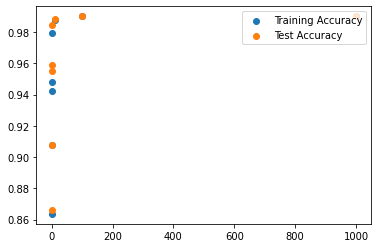

In [10]:
plt.scatter(cVals, acc_train_svm_linear)
plt.grid()

plt.scatter(cVals, acc_test_svm_linear)
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

## SVM using Radial Basis Function(RBF) Kernel

In [13]:
def svm_rbf(c, x_train, y_train, x_test, y_test, acc_train, acc_test):
    # Fit the classifier on the training set
    print('Begin to train SVM using c = ', c)
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf.fit(x_train, y_train)
    # Find the prediction and accuracy on the training set
    Yhat_svc_rbf_train = svc_rbf.predict(x_train)
    acc_train.append(np.mean(Yhat_svc_rbf_train == y_train))
    
    # Find the prediction and accuracy on the test set
    Yhat_svc_rbf_test = svc_rbf.predict(x_test)
    acc_test.append(np.mean(Yhat_svc_rbf_test == y_test))

In [14]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []

cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for c in cVals:
    %time svm_rbf(c, x_train, y_train, x_test, y_test, acc_train_svm_rbf, acc_test_svm_rbf)

Begin to train SVM using c =  0.0001
CPU times: user 2.21 s, sys: 29.9 ms, total: 2.24 s
Wall time: 2.24 s
Begin to train SVM using c =  0.001
CPU times: user 2.28 s, sys: 30 ms, total: 2.31 s
Wall time: 2.31 s
Begin to train SVM using c =  0.01
CPU times: user 1.39 s, sys: 20.2 ms, total: 1.41 s
Wall time: 1.41 s
Begin to train SVM using c =  0.1
CPU times: user 688 ms, sys: 19.9 ms, total: 708 ms
Wall time: 707 ms
Begin to train SVM using c =  1
CPU times: user 297 ms, sys: 0 ns, total: 297 ms
Wall time: 296 ms
Begin to train SVM using c =  10
CPU times: user 130 ms, sys: 0 ns, total: 130 ms
Wall time: 130 ms
Begin to train SVM using c =  100
CPU times: user 116 ms, sys: 86 µs, total: 116 ms
Wall time: 115 ms
Begin to train SVM using c =  1000
CPU times: user 122 ms, sys: 0 ns, total: 122 ms
Wall time: 122 ms


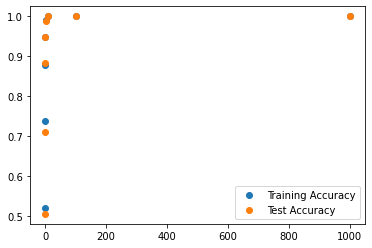

In [14]:
plt.scatter(cVals, acc_train_svm_rbf)
plt.grid()

plt.scatter(cVals, acc_test_svm_rbf)
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

## SVM using Polynomial Kernel

In [18]:
def svm_poly(c, x_train, y_train, x_test, y_test, acc_train, acc_test):
    # Fit the classifier on the training set
    print('Begin to train SVM using c = ', c)
    svc_poly = svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_poly.fit(x_train, y_train)
    
    # Find the prediction and accuracy on the training set
    Yhat_svc_poly_train = svc_poly.predict(x_train)
    acc_train.append(np.mean(Yhat_svc_poly_train == y_train))
    
    # Find the prediction and accuracy on the test set
    Yhat_svc_poly_test = svc_poly.predict(x_test)
    acc_test.append(np.mean(Yhat_svc_poly_test == y_test))

In [19]:
acc_train_svm_poly = []
acc_test_svm_poly = []

cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for c in cVals:
    %time svm_poly(c, x_train, y_train, x_test, y_test, acc_train_svm_poly, acc_test_svm_poly)

Begin to train SVM using c =  0.0001
CPU times: user 1.61 s, sys: 30 ms, total: 1.64 s
Wall time: 1.64 s
Begin to train SVM using c =  0.001
CPU times: user 1.19 s, sys: 20 ms, total: 1.21 s
Wall time: 1.21 s
Begin to train SVM using c =  0.01
CPU times: user 695 ms, sys: 36 µs, total: 695 ms
Wall time: 694 ms
Begin to train SVM using c =  0.1
CPU times: user 373 ms, sys: 29 µs, total: 374 ms
Wall time: 373 ms
Begin to train SVM using c =  1
CPU times: user 183 ms, sys: 0 ns, total: 183 ms
Wall time: 182 ms
Begin to train SVM using c =  10
CPU times: user 162 ms, sys: 0 ns, total: 162 ms
Wall time: 161 ms
Begin to train SVM using c =  100
CPU times: user 165 ms, sys: 10 µs, total: 165 ms
Wall time: 164 ms
Begin to train SVM using c =  1000
CPU times: user 167 ms, sys: 0 ns, total: 167 ms
Wall time: 167 ms


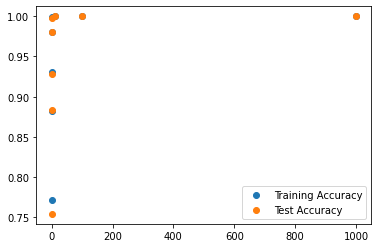

In [20]:
plt.scatter(cVals, acc_train_svm_poly)
plt.grid()

plt.scatter(cVals, acc_test_svm_poly)
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [21]:
data_regularization = pd.DataFrame(np.array([acc_train_svm_linear, acc_test_svm_linear, acc_train_svm_rbf, acc_test_svm_rbf, acc_train_svm_poly, acc_test_svm_poly]), index=['Training Linear', 'Test Linear', 'Training RBF', 'Test RBF', 'Training Poly', 'Test Poly'], columns=cVals)
data_regularization

,0.0001,0.0010,0.0100,0.1000,1.0000,10.0000,100.0000,1000.0000
Training Linear,0.860167,0.905629,0.946004,0.951748,0.968653,0.987527,0.991466,0.989824
Test Linear,0.862629,0.906942,0.942885,0.947809,0.968981,0.989168,0.992122,0.991137
Training RBF,0.521910,0.737404,0.879206,0.948465,0.990973,1.000000,1.000000,1.000000
Test RBF,0.506155,0.710487,0.882324,0.947809,0.989168,1.000000,1.000000,1.000000
Training Poly,0.771869,0.882160,0.930904,0.980141,0.999015,1.000000,1.000000,1.000000
Test Poly,0.754308,0.883309,0.927622,0.979813,0.997538,1.000000,1.000000,1.000000


In [ ]:
for i in range(len(w)):
    w[i] = w[i][0]

In [25]:
w_df = pd.DataFrame(w, columns=df.columns[1:], index=['0.0001', '0.001', '0.01', '0.1', '1', '10', '100', '1000'])
w_df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0.0001,0.018474,0.036187,0.003357,-0.068166,-0.058571,0.007900,-0.050649,0.071662,-0.184256,-0.038621,...,-0.061049,-0.048843,-0.069544,-0.066521,0.014800,-0.019200,-0.112625,0.006457,0.149932,0.042908
0.001,0.019662,0.051678,0.002667,-0.295038,-0.154938,0.057021,-0.273596,0.459833,-0.092908,-0.158709,...,-0.201502,-0.116356,-0.013480,-0.010134,0.111042,-0.155177,-0.230881,-0.070040,0.259546,0.038493
0.01,0.003553,0.012208,-0.005621,-0.448091,-0.016659,0.380415,-1.164308,1.708929,-0.008803,-0.505800,...,-0.814694,-0.069412,-0.003785,-0.001456,0.642783,-0.369394,-0.000895,-0.126105,0.048328,0.029053
0.1,0.001153,0.002482,-0.011639,-0.651926,-0.019816,-0.389032,-2.084458,2.332571,-0.000274,-0.308332,...,-1.340622,-0.073535,-0.002018,-0.000827,1.744512,-0.157326,0.210126,-0.067907,-0.001889,0.001845
1,0.000003,0.000079,-0.000093,1.888974,-0.000070,-3.179845,-4.965208,5.492767,-0.000001,-3.361427,...,-1.615924,-0.933756,-0.000047,-0.000051,8.278039,-1.760174,1.076593,-0.131686,-0.000368,0.000075
10,0.000020,0.000536,-0.000693,2.124473,-0.295797,-3.212269,-10.293241,9.972911,-0.000306,-3.091340,...,-4.795494,-0.001493,0.000119,0.000086,20.429804,-0.445425,2.236024,-0.288047,-0.461510,0.072341
100,0.000010,0.000073,-0.000222,2.454804,-0.454340,-0.000888,-15.898666,13.720459,-0.000037,-4.180923,...,-7.360510,-0.000035,0.000025,0.000018,31.255830,-2.181852,3.906345,-0.000191,-0.635749,0.000152
1000,0.000001,0.000049,-0.000102,2.454443,-0.454369,-0.000563,-15.901182,13.721779,-0.000058,-4.181050,...,-7.360870,-0.000088,0.000007,0.000005,31.259552,-2.181928,3.907149,-0.000089,-0.635846,0.000107


<AxesSubplot:>

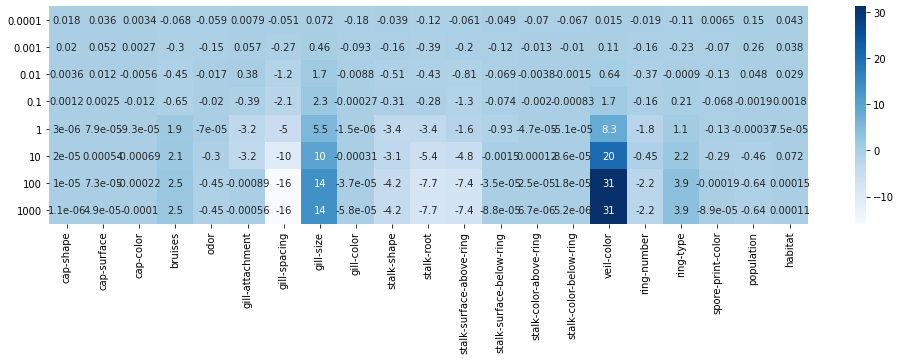

In [26]:
import seaborn as sbn
fig = plt.gcf()
fig.set_size_inches(17, 4)
sbn.heatmap(w_df,annot=True,cmap=plt.cm.Blues)